#### Plot the averages of sectors and find correlation

In [68]:
# Include libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import altair as alt
from sklearn.linear_model import LinearRegression

Data to include:
- Dates
- Year
- symbol
- gics_sector_name
- PX_LAST
- DATE_OF_LAST_EXECUTIVE_CHANGE
- TOT_STK_AWD_GIVEN_TO_CEO_EQUIV
- TOT_OPT_AWD_GIVEN_TO_CEO_EQUIV
- TOT_BONUSES_PAID_TO_CEO_EQUIV
- TOT_N_EQT_INCENT_GVN_TO_CEO_EQ
- COMP_LKD_LAST_CEO_&_EQUIV_CHG_DT
- ALL_OTHER_COMP_AW_TO_CEO_EQUIV

The data for the last seven columns are found in the SPX_Data directory

Each CSV file contains yearly data for the named feature. 

Last price every week (PX_LAST) contained in 503PXlast.

### Create dataframe

In [19]:
# Dates, years, symbol, PX_LAST 

# Read ata
px_last_raw_data = pd.read_csv('../../data/503PXlast.csv', index_col=0, parse_dates=True)

# Melt (reshape to long dataframe)
px_last_long = px_last_raw_data.reset_index().melt(id_vars='DATES', var_name='symbol', value_name='price')

# Rename column for consistency
px_last_long.rename(columns={'DATES':'date'},inplace=True)

# Create year column beside date column
px_last_long.insert(1, 'year', pd.to_datetime(px_last_long['date']).dt.year)

display(px_last_long.head())
px_last_long.index

,date,year,symbol,price
0,2015-01-02,2015,LYB UN Equity,80.07
1,2015-01-09,2015,LYB UN Equity,78.98
2,2015-01-16,2015,LYB UN Equity,79.84
3,2015-01-23,2015,LYB UN Equity,80.80
4,2015-01-30,2015,LYB UN Equity,79.09


RangeIndex(start=0, stop=263069, step=1)

In [20]:
# gics_sector_name

# Read data 
gics_sector_data = pd.read_csv('../../data/503_GICSData.csv', index_col=0)

# Merge dataframe with gics_sector_data dataframe
merged_df = px_last_long.merge(gics_sector_data[['gics_sector_name']], left_on='symbol', right_index=True,how='left')

# Move gics_sector_name data beside symbol
merged_df.rename(columns={'gics_sector_name':'temp'}, inplace=True)
merged_df.insert(3, 'gics_sector_name', merged_df['temp'])
merged_df.drop('temp', axis=1, inplace=True)

display(merged_df.head())

,date,year,symbol,gics_sector_name,price
0,2015-01-02,2015,LYB UN Equity,Materials,80.07
1,2015-01-09,2015,LYB UN Equity,Materials,78.98
2,2015-01-16,2015,LYB UN Equity,Materials,79.84
3,2015-01-23,2015,LYB UN Equity,Materials,80.80
4,2015-01-30,2015,LYB UN Equity,Materials,79.09


In [21]:
'''
The data is formatted similarly; use the function to format it such that 
the date and symbols columns can be matched to those of merged_df.

@param: feature name 

'''

def reformat_dataframe(feature, data_name='value'):
    data = pd.read_csv('../../data/SPX_Data/' + feature + '.csv', parse_dates=['Date'])
    long_data = data.melt(id_vars='Date', var_name='symbol', value_name=data_name)
    long_data.rename(columns={'Date':'date'}, inplace=True)
    long_data.insert(1,'year', pd.to_datetime(long_data['date']).dt.year)

    return long_data

In [22]:
# Remaining columns:
#- DATE_OF_LAST_EXECUTIVE_CHANGE        UNUSED
#- TOT_STK_AWD_GIVEN_TO_CEO_EQUIV
#- TOT_OPT_AWD_GIVEN_TO_CEO_EQUIV
#- TOT_BONUSES_PAID_TO_CEO_EQUIV
#- TOT_N_EQT_INCENT_GVN_TO_CEO_EQ
#- ALL_OTHER_COMP_AW_TO_CEO_EQUIV       UNUSED

TOT_STK_AWD_GIVEN_TO_CEO_EQUIV          = reformat_dataframe('TOT_STK_AWD_GIVEN_TO_CEO_EQUIV', data_name='TOT_STK_AWD_GIVEN_TO_CEO_EQUIV')    
TOT_OPT_AWD_GIVEN_TO_CEO_EQUIV          = reformat_dataframe('TOT_OPT_AWD_GIVEN_TO_CEO_EQUIV', data_name='TOT_OPT_AWD_GIVEN_TO_CEO_EQUIV')    
TOT_BONUSES_PAID_TO_CEO_EQUIV           = reformat_dataframe('TOT_BONUSES_PAID_TO_CEO_EQUIV',  data_name='TOT_BONUSES_PAID_TO_CEO_EQUIV')  
TOT_N_EQT_INCENT_GVN_TO_CEO_EQ          = reformat_dataframe('TOT_N_EQT_INCENT_GVN_TO_CEO_EQ', data_name='TOT_N_EQT_INCENT_GVN_TO_CEO_EQ')
ALL_OTHER_COMP_AW_TO_CEO_EQUIV          = reformat_dataframe('ALL_OTHER_COMP_AW_TO_CEO_EQUIV', data_name='ALL_OTHER_COMP_AW_TO_CEO_EQUIV')        


In [23]:
# Finalize main dataframe without featured engineered columns

main_df = pd.merge(merged_df, TOT_STK_AWD_GIVEN_TO_CEO_EQUIV[['year', 'symbol', 'TOT_STK_AWD_GIVEN_TO_CEO_EQUIV']], on=['year', 'symbol'], how='left')
main_df = pd.merge(main_df, TOT_OPT_AWD_GIVEN_TO_CEO_EQUIV[['year', 'symbol', 'TOT_OPT_AWD_GIVEN_TO_CEO_EQUIV']], on=['year', 'symbol'], how='left')
main_df = pd.merge(main_df, TOT_BONUSES_PAID_TO_CEO_EQUIV[['year', 'symbol', 'TOT_BONUSES_PAID_TO_CEO_EQUIV']], on=['year', 'symbol'], how='left')
main_df = pd.merge(main_df, TOT_N_EQT_INCENT_GVN_TO_CEO_EQ[['year', 'symbol', 'TOT_N_EQT_INCENT_GVN_TO_CEO_EQ']], on=['year', 'symbol'], how='left')
main_df = pd.merge(main_df, ALL_OTHER_COMP_AW_TO_CEO_EQUIV[['year', 'symbol', 'ALL_OTHER_COMP_AW_TO_CEO_EQUIV']], on=['year', 'symbol'], how='left')


display(main_df.head())

,date,year,symbol,gics_sector_name,price,TOT_STK_AWD_GIVEN_TO_CEO_EQUIV,TOT_OPT_AWD_GIVEN_TO_CEO_EQUIV,TOT_BONUSES_PAID_TO_CEO_EQUIV,TOT_N_EQT_INCENT_GVN_TO_CEO_EQ,ALL_OTHER_COMP_AW_TO_CEO_EQUIV
0,2015-01-02,2015,LYB UN Equity,Materials,80.07,12356319.0,6518771.0,0.0,4026937.0,20040667.0
1,2015-01-09,2015,LYB UN Equity,Materials,78.98,12356319.0,6518771.0,0.0,4026937.0,20040667.0
2,2015-01-16,2015,LYB UN Equity,Materials,79.84,12356319.0,6518771.0,0.0,4026937.0,20040667.0
3,2015-01-23,2015,LYB UN Equity,Materials,80.80,12356319.0,6518771.0,0.0,4026937.0,20040667.0
4,2015-01-30,2015,LYB UN Equity,Materials,79.09,12356319.0,6518771.0,0.0,4026937.0,20040667.0


In [24]:
# Add cash:equity compensatio ratio column to main_df

main_df.loc[:,"equity_Compensation_CEO"] = main_df['TOT_STK_AWD_GIVEN_TO_CEO_EQUIV']+main_df["TOT_OPT_AWD_GIVEN_TO_CEO_EQUIV"]
main_df.loc[:,"cash_incentive_CEO"] = main_df['TOT_BONUSES_PAID_TO_CEO_EQUIV']+main_df['TOT_N_EQT_INCENT_GVN_TO_CEO_EQ']
main_df.loc[:,"Variable_Pay_CEO"] = main_df["cash_incentive_CEO"]+main_df["equity_Compensation_CEO"]
main_df.loc[:,"cash_incentive_CEO_percent"] = main_df["cash_incentive_CEO"]/main_df["Variable_Pay_CEO"]

In [25]:
# Drop NaNs
main_df.dropna(inplace=True)
main_df.reset_index(inplace=True, drop=True)


In [26]:
# Preview main dataframe 

display(main_df)
main_df.info()

,date,year,symbol,gics_sector_name,price,TOT_STK_AWD_GIVEN_TO_CEO_EQUIV,TOT_OPT_AWD_GIVEN_TO_CEO_EQUIV,TOT_BONUSES_PAID_TO_CEO_EQUIV,TOT_N_EQT_INCENT_GVN_TO_CEO_EQ,ALL_OTHER_COMP_AW_TO_CEO_EQUIV,equity_Compensation_CEO,cash_incentive_CEO,Variable_Pay_CEO,cash_incentive_CEO_percent
0,2015-01-02,2015,LYB UN Equity,Materials,80.07,12356319.0,6518771.0,0.0,4026937.0,20040667.0,18875090.0,4026937.0,22902027.0,0.175833
1,2015-01-09,2015,LYB UN Equity,Materials,78.98,12356319.0,6518771.0,0.0,4026937.0,20040667.0,18875090.0,4026937.0,22902027.0,0.175833
2,2015-01-16,2015,LYB UN Equity,Materials,79.84,12356319.0,6518771.0,0.0,4026937.0,20040667.0,18875090.0,4026937.0,22902027.0,0.175833
3,2015-01-23,2015,LYB UN Equity,Materials,80.80,12356319.0,6518771.0,0.0,4026937.0,20040667.0,18875090.0,4026937.0,22902027.0,0.175833
4,2015-01-30,2015,LYB UN Equity,Materials,79.09,12356319.0,6518771.0,0.0,4026937.0,20040667.0,18875090.0,4026937.0,22902027.0,0.175833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212836,2023-12-01,2023,MOH UN Equity,Health Care,362.76,15500092.0,0.0,0.0,4410000.0,15581723.0,15500092.0,4410000.0,19910092.0,0.221496
212837,2023-12-08,2023,MOH UN Equity,Health Care,367.72,15500092.0,0.0,0.0,4410000.0,15581723.0,15500092.0,4410000.0,19910092.0,0.221496
212838,2023-12-15,2023,MOH UN Equity,Health Care,362.98,15500092.0,0.0,0.0,4410000.0,15581723.0,15500092.0,4410000.0,19910092.0,0.221496
212839,2023-12-22,2023,MOH UN Equity,Health Care,358.38,15500092.0,0.0,0.0,4410000.0,15581723.0,15500092.0,4410000.0,19910092.0,0.221496


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212841 entries, 0 to 212840
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   date                            212841 non-null  datetime64[ns]
 1   year                            212841 non-null  int32         
 2   symbol                          212841 non-null  object        
 3   gics_sector_name                212841 non-null  object        
 4   price                           212841 non-null  float64       
 5   TOT_STK_AWD_GIVEN_TO_CEO_EQUIV  212841 non-null  float64       
 6   TOT_OPT_AWD_GIVEN_TO_CEO_EQUIV  212841 non-null  float64       
 7   TOT_BONUSES_PAID_TO_CEO_EQUIV   212841 non-null  float64       
 8   TOT_N_EQT_INCENT_GVN_TO_CEO_EQ  212841 non-null  float64       
 9   ALL_OTHER_COMP_AW_TO_CEO_EQUIV  212841 non-null  float64       
 10  equity_Compensation_CEO         212841 non-null  float64

In [27]:
# Save finalized dataframe as CSV file
# NOTE: NaN values remain in the dataframe

# main_df.to_csv('../../data/finalized_df.csv')


In [28]:
# Get list of sector names

sectors = main_df['gics_sector_name'].unique()

print(sectors)

['Materials' 'Financials' 'Communication Services' 'Energy'
 'Information Technology' 'Industrials' 'Consumer Staples' 'Health Care'
 'Real Estate' 'Consumer Discretionary' 'Utilities']


In [29]:
# Reference line

# merged_df["marketcap_weight"] = merged_df.groupby(["Date", "gics_sector_name"])["MarketCap"].apply(lambda x: x / x.sum())

In [30]:
# # Ensure data is sorted properly
# df = df.sort_values(by=['symbol', 'date'])

# # Extract the last entry of each year for each symbol
# df_year_end = df.groupby(['symbol', 'year']).last().reset_index()

# # Compute the year-over-year price change as a ratio
# df_year_end['prev_year_price'] = df_year_end.groupby('symbol')['price'].shift(1)
# df_year_end['price_change_ratio'] = df_year_end['price'] / df_year_end['prev_year_price']
# df_year_end = df_year_end.dropna()

In [31]:
# Ensure data is sorted properly after dropping NaNs
main_df.sort_values(by=['gics_sector_name', 'symbol', 'date'], inplace=True)

# # Add yearly percentage returns
# temp_df = main_df.groupby(['symbol', 'year']).last().reset_index()
# temp_df['prev_year_price'] = temp_df.groupby('symbol')['price'].shift(1)
# main_df['yearly_percent_return'] = temp_df['price']/temp_df['prev_year_price']



# Add bin category column
num_bins = 10
main_df['compensation_bins'] = pd.cut(main_df['cash_incentive_CEO_percent'], bins=[i/num_bins for i in range(num_bins+1)], include_lowest=True)

display(main_df)
main_df.info()    

,date,year,symbol,gics_sector_name,price,TOT_STK_AWD_GIVEN_TO_CEO_EQUIV,TOT_OPT_AWD_GIVEN_TO_CEO_EQUIV,TOT_BONUSES_PAID_TO_CEO_EQUIV,TOT_N_EQT_INCENT_GVN_TO_CEO_EQ,ALL_OTHER_COMP_AW_TO_CEO_EQUIV,equity_Compensation_CEO,cash_incentive_CEO,Variable_Pay_CEO,cash_incentive_CEO_percent,compensation_bins
68581,2015-01-02,2015,CHTR UW Equity,Communication Services,184.063260,999925.0,8999426.0,0.0,4156600.0,10204787.0,9999351.0,4156600.0,14155951.0,0.293629,"(0.2, 0.3]"
68582,2015-01-09,2015,CHTR UW Equity,Communication Services,179.141783,999925.0,8999426.0,0.0,4156600.0,10204787.0,9999351.0,4156600.0,14155951.0,0.293629,"(0.2, 0.3]"
68583,2015-01-16,2015,CHTR UW Equity,Communication Services,178.179606,999925.0,8999426.0,0.0,4156600.0,10204787.0,9999351.0,4156600.0,14155951.0,0.293629,"(0.2, 0.3]"
68584,2015-01-23,2015,CHTR UW Equity,Communication Services,175.768635,999925.0,8999426.0,0.0,4156600.0,10204787.0,9999351.0,4156600.0,14155951.0,0.293629,"(0.2, 0.3]"
68585,2015-01-30,2015,CHTR UW Equity,Communication Services,167.125636,999925.0,8999426.0,0.0,4156600.0,10204787.0,9999351.0,4156600.0,14155951.0,0.293629,"(0.2, 0.3]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115726,2023-12-01,2023,XEL UW Equity,Utilities,61.430000,18000011.0,0.0,0.0,1811160.0,18246008.0,18000011.0,1811160.0,19811171.0,0.091421,"(-0.001, 0.1]"
115727,2023-12-08,2023,XEL UW Equity,Utilities,60.910000,18000011.0,0.0,0.0,1811160.0,18246008.0,18000011.0,1811160.0,19811171.0,0.091421,"(-0.001, 0.1]"
115728,2023-12-15,2023,XEL UW Equity,Utilities,61.580000,18000011.0,0.0,0.0,1811160.0,18246008.0,18000011.0,1811160.0,19811171.0,0.091421,"(-0.001, 0.1]"
115729,2023-12-22,2023,XEL UW Equity,Utilities,62.060000,18000011.0,0.0,0.0,1811160.0,18246008.0,18000011.0,1811160.0,19811171.0,0.091421,"(-0.001, 0.1]"


<class 'pandas.core.frame.DataFrame'>
Index: 212841 entries, 68581 to 115730
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   date                            212841 non-null  datetime64[ns]
 1   year                            212841 non-null  int32         
 2   symbol                          212841 non-null  object        
 3   gics_sector_name                212841 non-null  object        
 4   price                           212841 non-null  float64       
 5   TOT_STK_AWD_GIVEN_TO_CEO_EQUIV  212841 non-null  float64       
 6   TOT_OPT_AWD_GIVEN_TO_CEO_EQUIV  212841 non-null  float64       
 7   TOT_BONUSES_PAID_TO_CEO_EQUIV   212841 non-null  float64       
 8   TOT_N_EQT_INCENT_GVN_TO_CEO_EQ  212841 non-null  float64       
 9   ALL_OTHER_COMP_AW_TO_CEO_EQUIV  212841 non-null  float64       
 10  equity_Compensation_CEO         212841 non-null  float64 

In [60]:
result = main_df.groupby(['gics_sector_name', 'compensation_bins'])['price'].mean().reset_index()
result.dropna(inplace=True)
result['compensation_bins_encoded'] = result['compensation_bins'].cat.codes + 1


/tmp/ipykernel_3898/3360001039.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = main_df.groupby(['gics_sector_name', 'compensation_bins'])['price'].mean().reset_index()


In [119]:
display(result)
print(result.info())
print('\nCorrelation')
for sector_name,i in result.groupby("gics_sector_name"):
    y= i["price"]
    x=np.arange(len(y))
    np.corrcoef(x,y)[0, 1]
    print("{} {}".format(sector_name,np.corrcoef(x,y)[0, 1]))

print(result['compensation_bins'].unique())

,gics_sector_name,compensation_bins,price,compensation_bins_encoded
0,Communication Services,"(-0.001, 0.1]",184.576042,1
1,Communication Services,"(0.1, 0.2]",123.282354,2
2,Communication Services,"(0.2, 0.3]",78.989304,3
3,Communication Services,"(0.3, 0.4]",66.034129,4
4,Communication Services,"(0.4, 0.5]",30.516689,5
...,...,...,...,...
101,Utilities,"(0.1, 0.2]",50.387447,2
102,Utilities,"(0.2, 0.3]",59.343564,3
103,Utilities,"(0.3, 0.4]",60.409406,4
104,Utilities,"(0.4, 0.5]",73.710881,5


<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 105
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   gics_sector_name           94 non-null     object  
 1   compensation_bins          94 non-null     category
 2   price                      94 non-null     float64 
 3   compensation_bins_encoded  94 non-null     int8    
dtypes: category(1), float64(1), int8(1), object(1)
memory usage: 2.8+ KB
None

Correlation
Communication Services -0.31172835954824313
Consumer Discretionary 0.5150919785649488
Consumer Staples -0.8593708792901752
Energy 0.5443099644608314
Financials -0.41296744851711814
Health Care -0.019016843793959026
Industrials -0.17314099869888627
Information Technology -0.2744768375271294
Materials -0.7197072763926178
Real Estate 0.25166427280078973
Utilities 0.9608059738546003
[(-0.001, 0.1], (0.1, 0.2], (0.2, 0.3], (0.3, 0.4], (0.4, 0.5], (0.5, 0.6], (0.6, 0.7]

In [137]:
compensation_bin_mapping = {
    1: "(0.0, 0.1]",
    2: "(0.1, 0.2]",
    3: "(0.2, 0.3]",
    4: "(0.3, 0.4]",
    5: "(0.4, 0.5]",
    6: "(0.5, 0.6]",
    7: "(0.6, 0.7]",
    8: "(0.7, 0.8]",
    9: "(0.8, 0.9]",
    10: "(0.9, 1.0]",
}

def plot(data, sector):
    sector_data = data[data['gics_sector_name'] == sector]

    # Ensure all compensation_bins_encoded (1-10) are represented
    all_bins = range(1, 11)

    # Group by encoded compensation bin and compute average price
    grouped_data = sector_data.groupby('compensation_bins_encoded')['price'].mean()

    # Reindex to include all bins, filling missing ones with NaN
    grouped_data = grouped_data.reindex(all_bins)

    # Plot the bar chart
    plt.figure(figsize=(10, 5))
    plt.bar(grouped_data.index, grouped_data.values, color='royalblue', alpha=0.7, label='Average Price')

    # Perform linear regression
    x = np.array(grouped_data.index)
    y = grouped_data.values
    mask = ~np.isnan(y)  # Remove NaN values before regression
    x_valid = x[mask]
    y_valid = y[mask]

    if len(x_valid) > 1:  # Ensure enough data for regression
        slope, intercept = np.polyfit(x_valid, y_valid, 1)
        trendline = np.poly1d((slope, intercept))
        plt.plot(x, trendline(x), color='red', linestyle='--', linewidth=2, label='Trend Line')

    plt.xlabel('Compensation Bins Encoded')
    plt.ylabel('Average Price')
    plt.title(f'Average Price per Compensation Bin in {sector}')
    
    # Corrected xticks
    plt.xticks(ticks=list(compensation_bin_mapping.keys()), labels=list(compensation_bin_mapping.values()), rotation=45, ha='right')

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

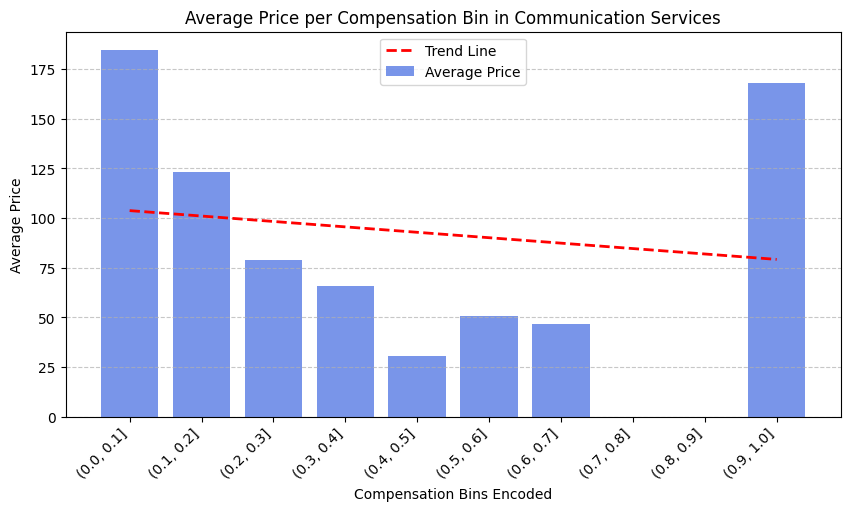

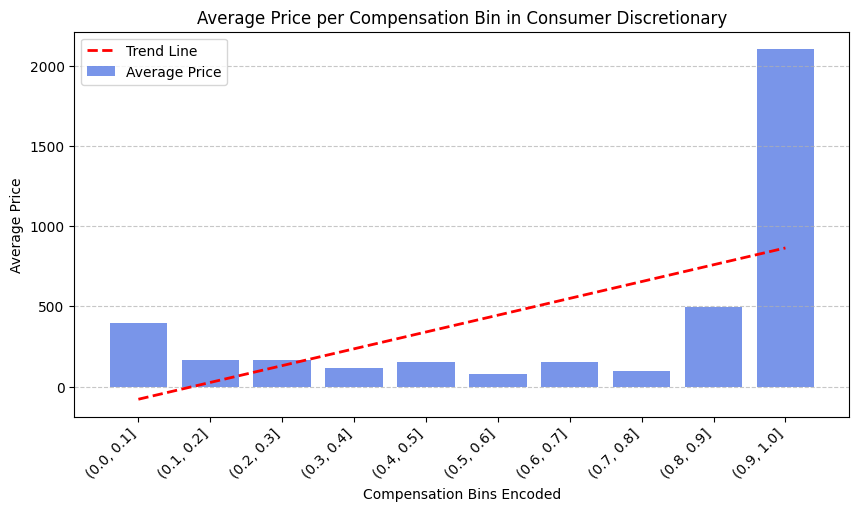

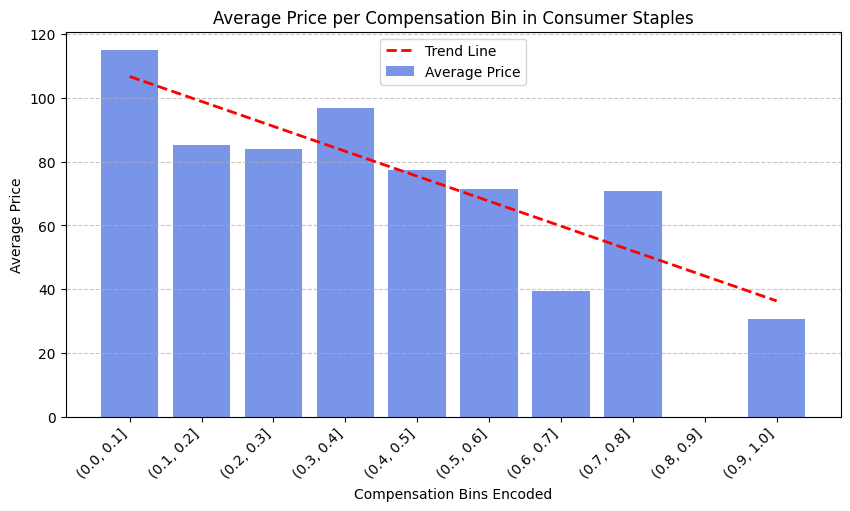

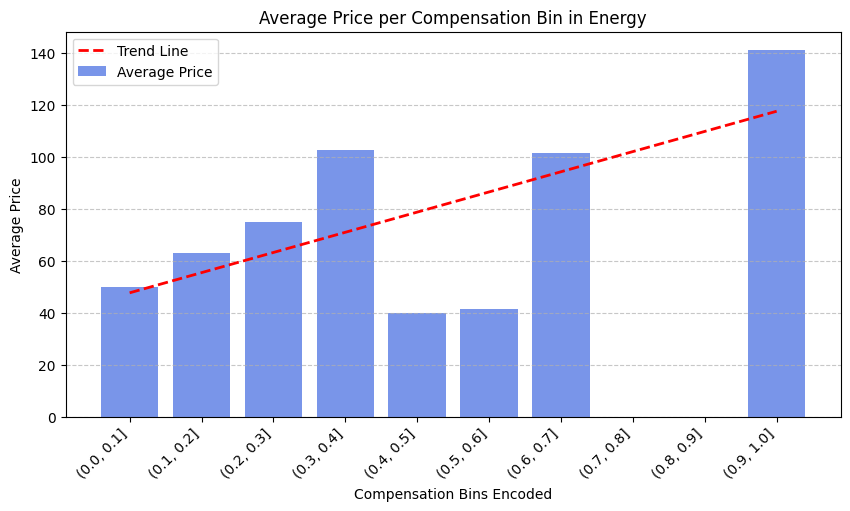

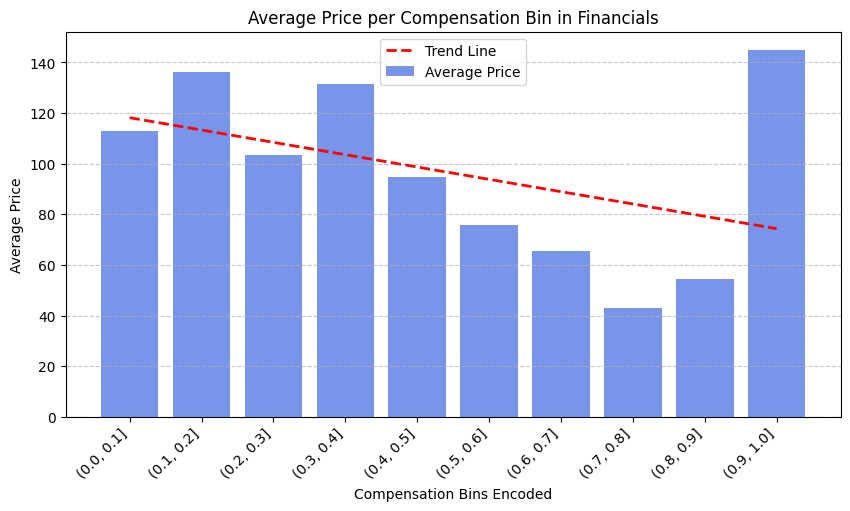

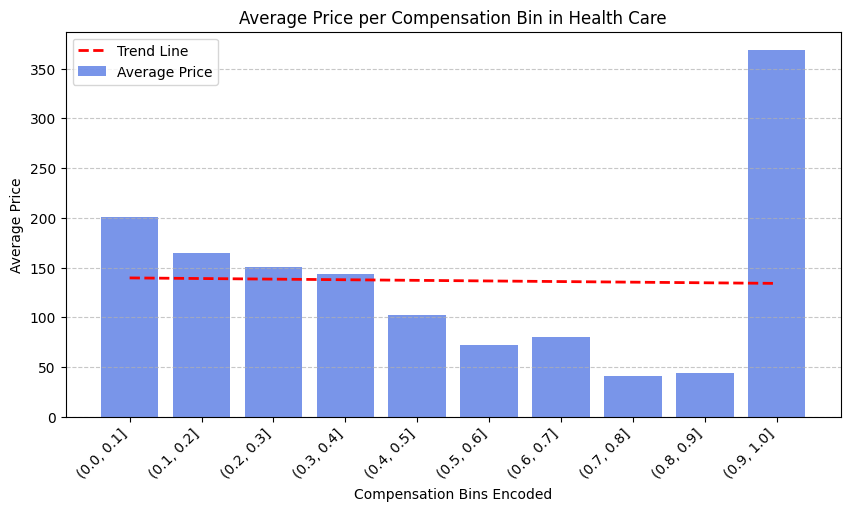

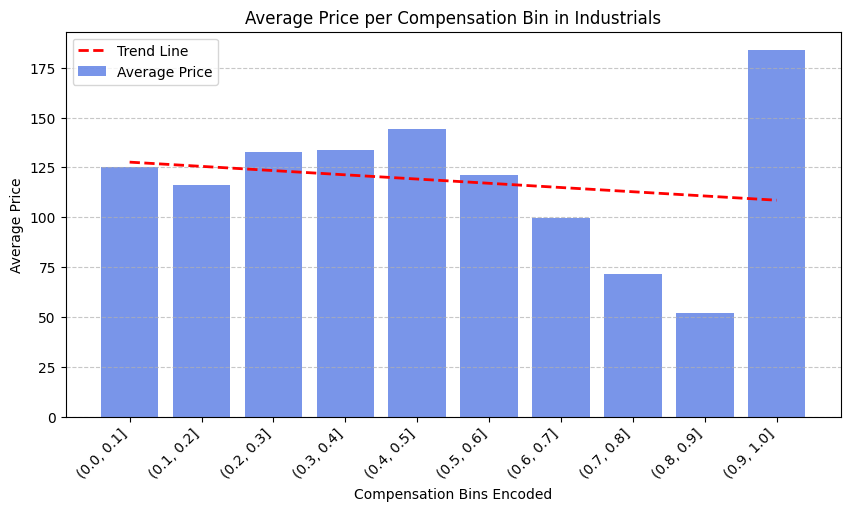

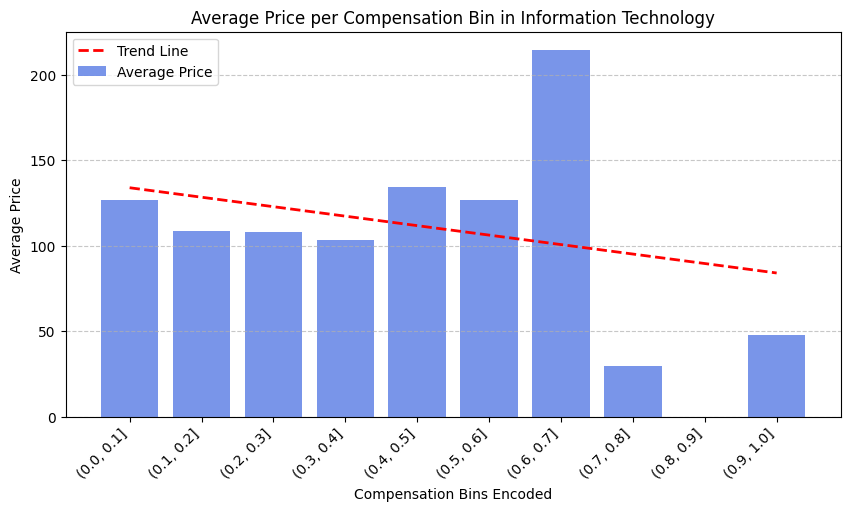

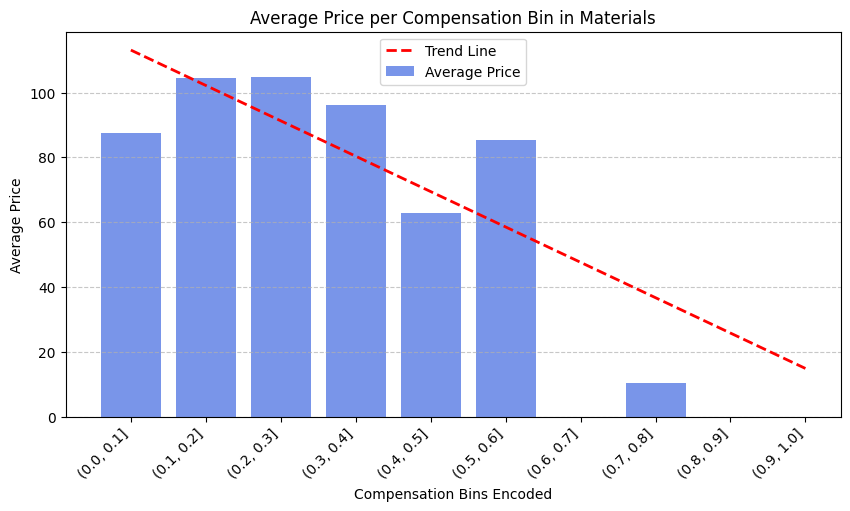

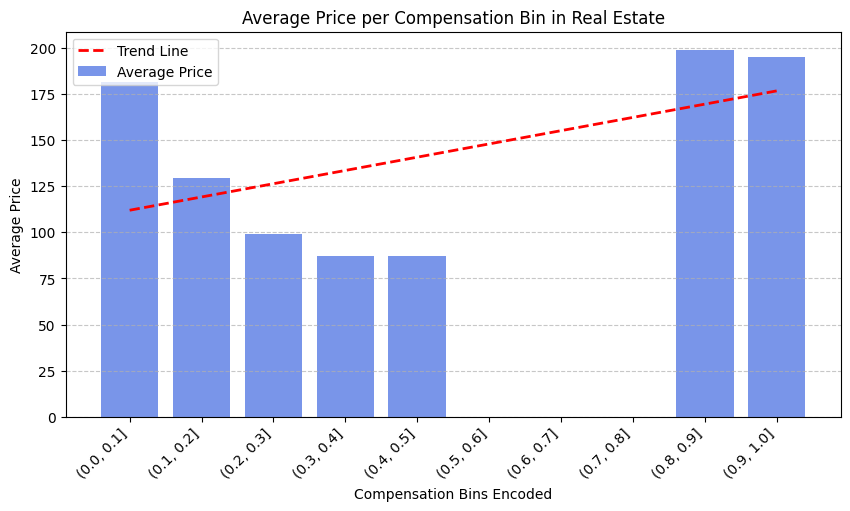

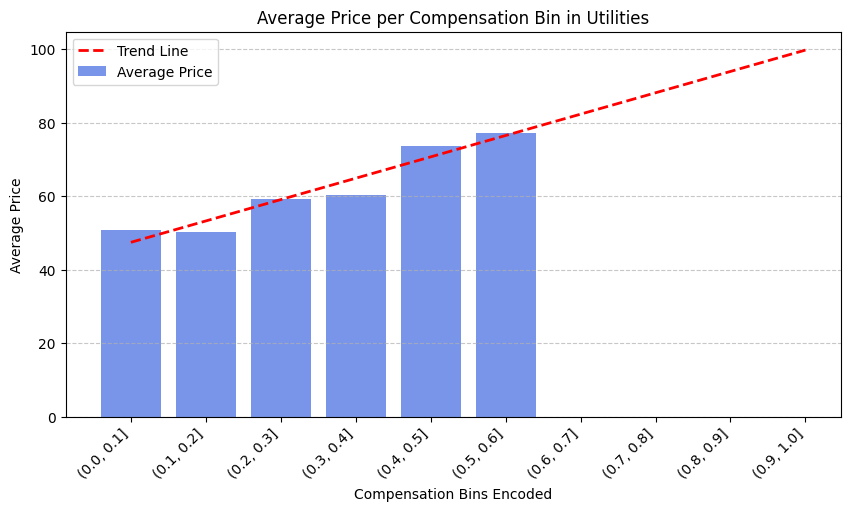

In [138]:
for i in result['gics_sector_name'].unique():
    plot(result, i)

In [144]:
print('\nCorrelation')
for sector_name,i in result.groupby("gics_sector_name"):
    y= i["price"]
    x=np.arange(len(y))
    np.corrcoef(x,y)[0, 1]
    print("{} {}".format(sector_name,np.corrcoef(x,y)[0, 1]))


Correlation
Communication Services -0.31172835954824313
Consumer Discretionary 0.5150919785649488
Consumer Staples -0.8593708792901752
Energy 0.5443099644608314
Financials -0.41296744851711814
Health Care -0.019016843793959026
Industrials -0.17314099869888627
Information Technology -0.2744768375271294
Materials -0.7197072763926178
Real Estate 0.25166427280078973
Utilities 0.9608059738546003
